#Task T2

##Consideraciones

- En el caso del algoritmo Taxation, se define un intervalo de valores para una variable beta, de tal forma que nos permita considerar la nueva probabilidad para el factor del Teleporting.
- En el caso de agregar una nueva probabilidad, también debemos definir un intervalo de valores para la nueva variable alpha, que nos permita, en este caso, considerar la probabilidad del factor Backwarding.
- Si alpha = 0, tendremos el mismo caso visto en el Taxation, pues tanto el nuevo término como la influencia de alpha en otro términos se hace nula.
- Si alpha + beta >= 1, se corre el riesgo de que si en algún momento el vector estacionario (M')Vi es igual a cero en todas sus componentes, el factor de probabilidad del teleporting sea negativo y afecte de la misma forma al vector estacionario (volviendo negativas todas sus componentes). Por lo tanto, debemos dar más márgen al comportamiento de beta y cuidar el valor de alpha de forma que alpha + beta < 1, para dar lugar a la probabilidad de sucesos tanto en el Teleporting como en el Backwarding.

In [1]:
import numpy as np

In [3]:
def resultPageRank(m):
    err = 1e-16
    mt = m.T
    v = np.full((len(m), 1), 1/len(m))
    prev_v = np.copy(v)
    while True:
        v = np.dot(mt, v)
        diff = np.max(np.abs(v - prev_v))
        if diff < err:
            break
        prev_v = v
    return v

In [4]:
def resutTaxation(beta, m):
    if beta < 0.8 or beta > 0.9: return "No se admite el valor de beta"
    err = 1e-16
    mt = m.T
    v = np.full((len(m), 1), 1 / len(m))
    prev_v = np.copy(v)
    v0 = np.copy(v)
    while True:
        v = np.dot(beta * mt, v) + (1 - beta) * v0
        diff = np.max(np.abs(v - prev_v))
        if diff < err:
            break
        prev_v = v
    return v

In [5]:
def resultTaxationBackwardingOp(alpha, beta, m):
    if beta < 0.7 or beta > 0.8: return "Beta debe estar en el intervalo [0.7, 0.8]"
    if alpha < 0 or alpha > 0.2: return "Alpha debe estar en el intervalo [0, 0.2]"
    if alpha + beta >= 1: return "Alpha y Beta deben ser tales que su suma sea menor a 1"
    err = 1e-16
    mt = m.T
    v = np.full((len(m), 1), 1 / len(m))
    prev_v = np.copy(v)
    v0 = np.copy(v)
    results = []
    i = 0
    while True:
        vb = results[i - 1] if i>0 else np.zeros((len(m), 1))
        v = np.dot(beta * mt, v) + np.dot(alpha * mt, vb) + (1 - beta - (alpha if i>0 else 0)) * v0
        results.append(v)
        diff = np.max(np.abs(v - prev_v))
        if diff < err:
            break
        prev_v = v
        i += 1
    return v

In [6]:
m = np.array([[0, 1/2, 1/2], [1/2, 0, 1/2], [0, 1, 0]])
beta = 0.8
alpha = 0.1
pageRank = resultPageRank(m)
taxation = resutTaxation(beta, m)
backwardingOp = resultTaxationBackwardingOp(alpha, beta, m)
print("\nPage Rank: \n", pageRank)
print("\nTaxation Page Rank: \n", taxation)
print("\nTaxation Backwarding Option Page Rank: \n", backwardingOp)


Page Rank: 
 [[0.22222222]
 [0.44444444]
 [0.33333333]]

Taxation Page Rank: 
 [[0.23809524]
 [0.42857143]
 [0.33333333]]

Taxation Backwarding Option Page Rank: 
 [[0.22988506]
 [0.43678161]
 [0.33333333]]


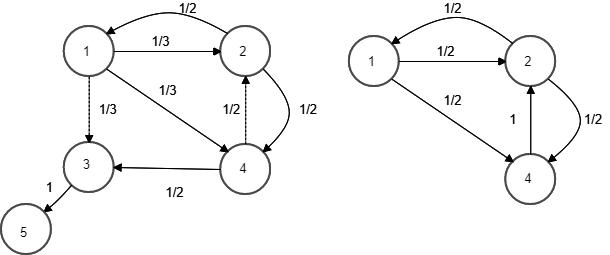

In [ ]:
m = np.array([[0, 1/3, 1/3, 1/3], [1/2, 0, 0, 1/2], [0, 0, 1, 0], [0, 1/2, 1/2, 0]])
beta = 0.8
alpha = 0.1
pageRank = resultPageRank(m)
taxation = resutTaxation(beta, m)
backwardingOp = resultTaxationBackwardingOp(alpha, beta, m)
print("\nPage Rank: \n", pageRank)
print("\nTaxation Page Rank: \n", taxation)
print("\nTaxation Backwarding Option Page Rank: \n", backwardingOp)


Page Rank: 
 [[4.08198811e-17]
 [5.94920013e-17]
 [1.00000000e+00]
 [5.94920013e-17]]

Taxation Page Rank: 
 [[0.10135135]
 [0.12837838]
 [0.64189189]
 [0.12837838]]

Taxation Backwarding Option Page Rank: 
 [[0.06024096]
 [0.07831325]
 [0.78313253]
 [0.07831325]]


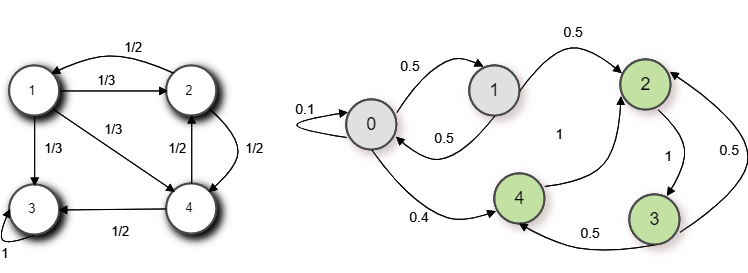

In [ ]:
m = np.array([[0, 1/3, 1/3, 1/3], [1/2, 0, 0, 1/2], [0, 0, 0, 0], [0, 1/2, 1/2, 0]])
beta = 0.8
alpha = 0.1
pageRank = resultPageRank(m)
taxation = resutTaxation(beta, m)
backwardingOp = resultTaxationBackwardingOp(alpha, beta, m)
print("\nPage Rank: \n", pageRank)
print("\nTaxation Page Rank: \n", taxation)
print("\nTaxation Backwarding Option Page Rank: \n", backwardingOp)


Page Rank: 
 [[1.44758591e-16]
 [2.10975094e-16]
 [2.10975094e-16]
 [2.10975094e-16]]

Taxation Page Rank: 
 [[0.10135135]
 [0.12837838]
 [0.12837838]
 [0.12837838]]

Taxation Backwarding Option Page Rank: 
 [[0.06024096]
 [0.07831325]
 [0.07831325]
 [0.07831325]]


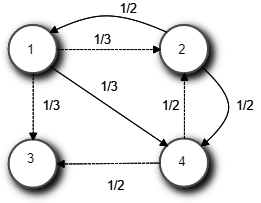

In [ ]:
m = np.array([[0, 1/3, 1/3, 1/3], [1/2, 0, 0, 1/2], [1, 0, 0, 0], [0, 1/2, 1/2, 0]])
beta = 0.8
alpha = 0.1
pageRank = resultPageRank(m)
taxation = resutTaxation(beta, m)
backwardingOp = resultTaxationBackwardingOp(alpha, beta, m)
print("\nPage Rank: \n", pageRank)
print("\nTaxation Page Rank: \n", taxation)
print("\nTaxation Backwarding Option Page Rank: \n", backwardingOp)


Page Rank: 
 [[0.33333333]
 [0.22222222]
 [0.22222222]
 [0.22222222]]

Taxation Page Rank: 
 [[0.32142857]
 [0.22619048]
 [0.22619048]
 [0.22619048]]

Taxation Backwarding Option Page Rank: 
 [[0.32758621]
 [0.22413793]
 [0.22413793]
 [0.22413793]]


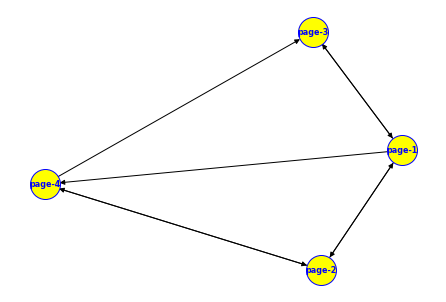

In [7]:
m = np.array([[0, 0, 1/2, 1/2, 0], [0, 0, 1/2, 0, 1/2], [0, 1, 0, 0, 0], [0, 0, 0, 1, 0], [1/2, 0, 0, 1/2, 0]])
beta = 0.8
alpha = 0.1
pageRank = resultPageRank(m)
taxation = resutTaxation(beta, m)
backwardingOp = resultTaxationBackwardingOp(alpha, beta, m)
print("\nPage Rank: \n", pageRank)
print("\nTaxation Page Rank: \n", taxation)
print("\nTaxation Backwarding Option Page Rank: \n", backwardingOp)


Page Rank: 
 [[4.61685179e-17]
 [1.26134737e-16]
 [1.09235886e-16]
 [1.00000000e+00]
 [7.99662188e-17]]

Taxation Page Rank: 
 [[0.07888041]
 [0.14300254]
 [0.12875318]
 [0.55216285]
 [0.09720102]]

Taxation Backwarding Option Page Rank: 
 [[0.04863666]
 [0.09697117]
 [0.08552353]
 [0.70523161]
 [0.06363703]]
